In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

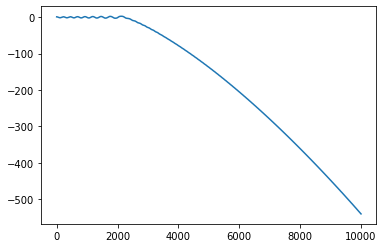

In [2]:
# dynamics simulation 

def get_force(angle, mass): return mass * -9.81 * np.sin(angle)
# game loop implementation

# system parameters
pendulum_mass = 0.7  #kg
pendulum_string_length = 0.1 #m

# step
dt = 0.01

# system state (incl. initial conditions)
pendulum_angle = 1.2
pendulum_angular_velocity = 0

result = []

# step between 0s and 10s every dt seconds
for step in np.arange(0.0, 100.0, dt):
    # get acceleration
    # F = m*a  ->  a = F/m
    acceleration = get_force(pendulum_angle, pendulum_mass) / pendulum_mass
    
    # do the time step
    pendulum_angle += pendulum_angular_velocity * dt
    pendulum_angular_velocity += acceleration * dt
    result.append(pendulum_angle)
    
plt.plot(result)
plt.show()

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.0000000e+00, 1.0000000e-06, 1.1000000e-05, 1.1100000e-04,
       1.1110000e-03, 1.1111000e-02, 1.1111100e-01, 1.1111110e+00,
       1.1111111e+01, 1.0000000e+02])
 t_events: None
        y: array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]])
 y_events: None

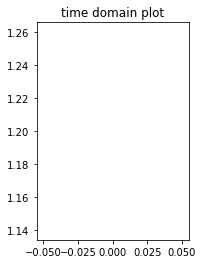

In [3]:
# battle plan: formulate system as a continuous-time model -> pass it to a differential equation solver

# this function needs to return dy/dt
# variable naming convention from control theory:
# y -> system state vector (sometimes 'u')
# t -> time
# p -> parameter vector
def model(t, y, p=()):
    pendulum_angle = y[0]
    pendulum_anglular_velocity = y[1]
    
    # TODO implement model
    
    return [0.0, 0.0]

# initial condition
y0 = [0,1.2]

# time points
time_span = (0.0, 100.0)

# solve ODEs
result = solve_ivp(model, time_span, y0, method='RK45', rtol=1e-8)

# plotting
fig = plt.figure()
ax = fig.add_subplot(1, 2, 2)
ax.plot(result.y[0, :],
        result.y[1, :])
ax.set_title("time domain plot")
result